**Import des bibliothèques**

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
# Pour les réseaux de neurones feed-forward
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , LSTM
from tensorflow.keras.optimizers import Adam
# Pour le découpage des échantillons
from sklearn.model_selection import train_test_split


**Fonctions de base**


In [2]:
################################################################
def generate_sin(taille_sinus):
    # Génération d'un signal de sinus, de taille taille_sinus
    x = np.linspace(0, 100, taille_sinus)

    sinus = np.sin(x)
    return sinus

################################################################
def generate_time_series(taille_sinus, ni):
    # génère une série temporelle
    # X est un sinus sur ni pas
    # y vaut la valeur du sinus au pas suivant
    sinus = generate_sin(taille_sinus)

    X, y = [], []
    for i in range(len(sinus) - ni):
        X.append(sinus[i:i + ni])
        y.append(sinus[i + ni])
    return np.array(X), np.array(y)

################################################################
def genere_LSTM(X,no,largeur):
    # X : sert à donner la taille des entrées
    # no : donne la taille des sorties
    # largeur : c'est la largeur de l'état cachées

    n, ni = np.shape(X)
    model = Sequential([
    LSTM(largeur, activation='relu', input_shape=(ni, 1)),
    Dense(no)])

    return model

################################################################


# **Génère un echantillon**

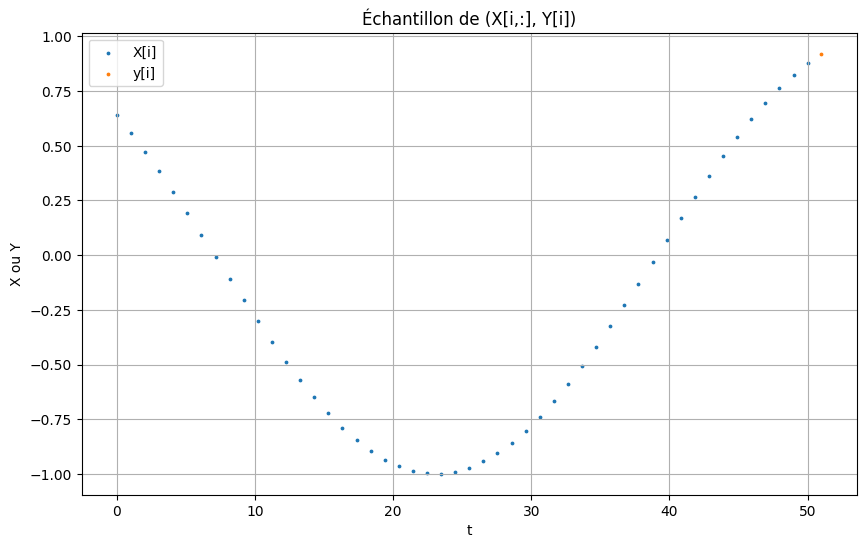

In [3]:
# caracteristiques de la série temporelle
taille_sinus = 1000
ni = 50

# Génére X et Y
X, y = generate_time_series(taille_sinus, ni)
n, ni = np.shape(X)
no = 1

# Afffichage d'un (X[i,:], y[i])
i = 150     # On doit avoir 0 <= i < n
plt.figure(figsize=(10, 6))
plt.scatter(np.linspace(0, ni), X[i,:], label='X[i]', alpha=1, s=3)
plt.scatter((ni+1), y[i], label='y[i]', alpha=1, s=3)
plt.title("Échantillon de (X[i,:], Y[i])")
plt.xlabel("t")
plt.ylabel("X ou Y")
plt.legend()
plt.grid()
plt.show()


**Génère un réseau de neurones LSTM (une variante des RNNs vus en cours)**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
950


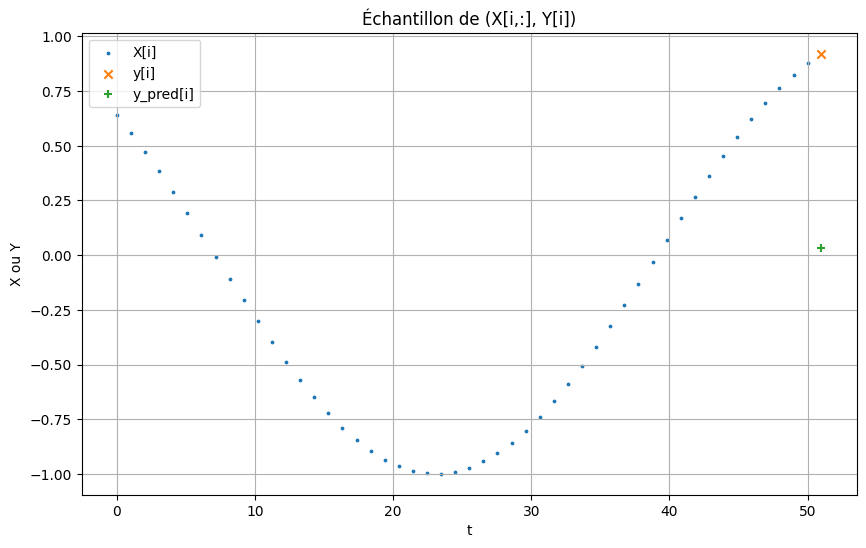

In [4]:
# architecture du réseau
largeur = 100
no = 1

# Création du réseau de neurone (initialisation à 0)
model = genere_LSTM(X,no,largeur)

# Affichage du modèle
model.summary()

# Prédiction faite par le réseau initial

y_pred = model.predict(X)

# Affichage d'un (X[i,:], y[i]) et du résultat pour le réseau initial
i = 150     # On doit avoir 0 <= i < n
print(n)
plt.figure(figsize=(10, 6))
plt.scatter(np.linspace(0, ni), X[i,:], label='X[i]', alpha=1, s=3)
plt.scatter((ni+1), y[i], label='y[i]', marker =  'x')
plt.scatter((ni+1), y_pred[i], label='y_pred[i]', marker = '+')
plt.title("Échantillon de (X[i,:], Y[i])")
plt.xlabel("t")
plt.ylabel("X ou Y")
plt.legend()
plt.grid()
plt.show()

**Optimisation du réseau de neurones (i.e. apprentissage)**

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - loss: 0.3407 - val_loss: 0.2028
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.1621 - val_loss: 0.1900
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.1854 - val_loss: 0.1021
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0810 - val_loss: 0.0196
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0122 - val_loss: 0.0022
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0012 - val_loss: 2.1830e-04
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 1.2542e-04 - val_loss: 5.1481e-05
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 3.8120e-05 - val_loss: 2.2339e-05
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 1.8532e-05 - val_loss: 1.2129e-05
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 8.4324e-06 - val_loss: 6.8580e-06
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 5.3054e-06 - val_loss: 4.2509e-06
Epoch 12/50
24/24 

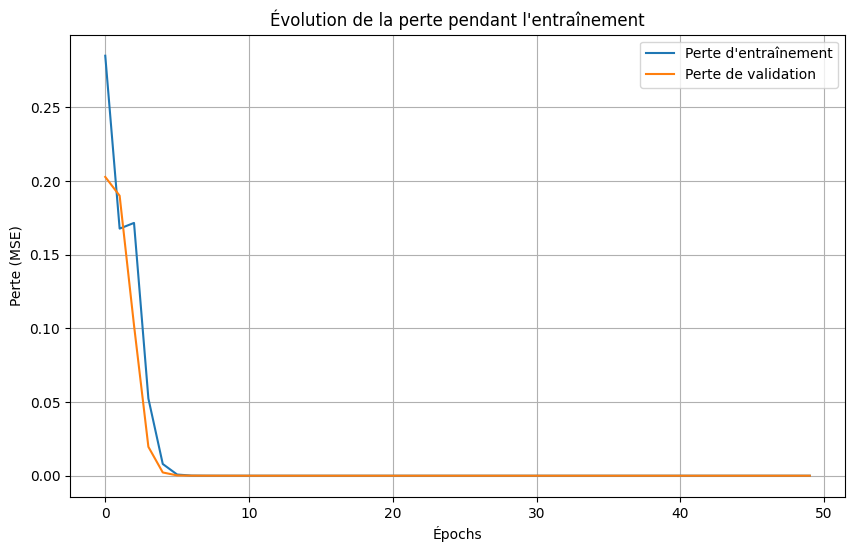

In [5]:
# découpage de l'échantillon
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Compilation du modèle (pour nous : définition de l'optimiseur et de la loss)
optimizer = Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss='mse')

# Optimisation des paramètres du modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)  # Essayer avec verbose = 1

# Évaluation du modèle
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Erreur quadratique moyenne sur l'ensemble de test : {loss:f}")

y_pred = model.predict(X)


# Visualisation de la perte pendant l'entraînement
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title("Évolution de la perte pendant l'entraînement")
plt.xlabel("Épochs")
plt.ylabel("Perte (MSE)")
plt.legend()
plt.grid()
plt.show()

950


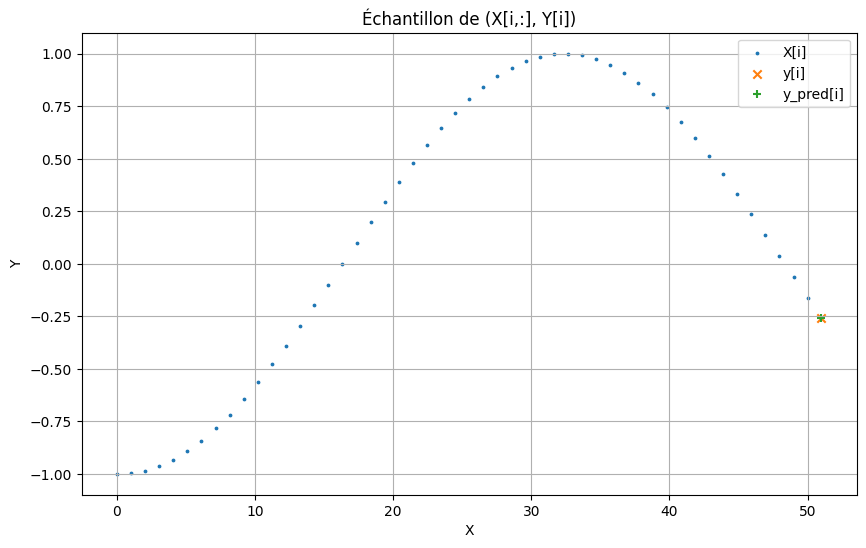

In [6]:
# Afffichage d'un (X[i,:], y[i]) et du résultat pour le réseau appris
i = 800      # On doit avoir 0 <= i < n
print(n)
plt.figure(figsize=(10, 6))
plt.scatter(np.linspace(0, ni), X[i,:], label='X[i]', alpha=1, s=3)
plt.scatter((ni+1), y[i], label='y[i]', marker = 'x')
plt.scatter((ni+1), y_pred[i], label='y_pred[i]', marker = '+')
plt.title("Échantillon de (X[i,:], Y[i])")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()


1. Modifier le code ci-dessus pour pouvoir considérer une valeur de $n_o$ quelconque, pour prédire plusieurs valeurs consécutives du sinus.
2. Jusqu'à quelle valeur pouvez-vous augmenter $n_o$ en conservant une prédiction dont la MSE est inférieure à $10^{-2}$.
3. Adaptez les codes développés jusque là dans le projet, et selectionnez des "features" judicieux pour réprésenter les gares et le jour, afin de résoudre au mieux le challenge **"Anticipez l'affluence au sein des gares SNCF-Transilien !"**, de la plateforme **challengedata**.

[https://challengedata.ens.fr/challenges/149](https://challengedata.ens.fr/challenges/149)